In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\placementdata.csv")

In [3]:
df.head(2)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [6]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = oe.fit_transform(df[[col]])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  float64
 8   PlacementTraining          10000 non-null  float64
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 937.6 KB


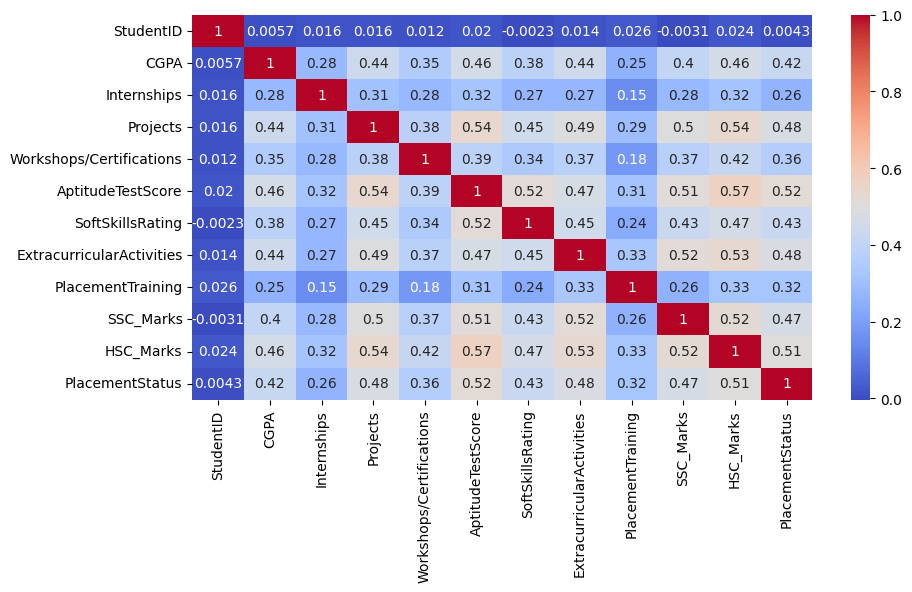

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
x = df.iloc[:,:-1]
y = df['PlacementStatus']

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [11]:
x = pd.DataFrame(ss.transform(x), columns=x.columns)

In [12]:
x.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,-1.731878,-0.309343,-0.073889,-1.182822,-0.014598,-1.770910,0.184742,-1.188261,-1.651836,-0.782306,0.504368
1,-1.731531,1.877818,-1.575689,1.121526,1.091319,1.292970,-0.787072,0.841566,0.605387,0.847618,0.840726
2,-1.731185,-0.621794,-0.073889,-0.030648,1.091319,0.312528,1.156555,0.841566,-1.651836,0.943496,0.616487
3,-1.730838,-0.309343,-0.073889,-1.182822,1.091319,0.680194,0.184742,0.841566,0.605387,1.135251,0.616487
4,-1.730492,0.940464,-0.073889,-0.030648,1.091319,0.802749,0.427695,0.841566,0.605387,0.464106,1.513441


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
lr.score(x_test, y_test)*100

40.8840475252377

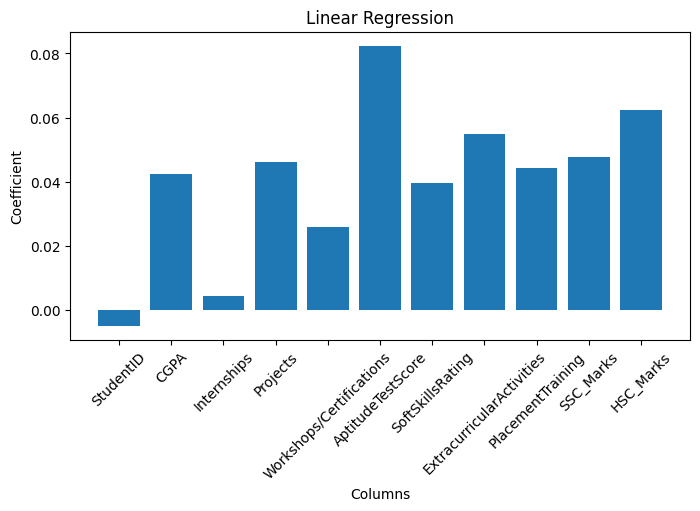

In [16]:
plt.figure(figsize=(8,4))
plt.bar(x.columns, lr.coef_,)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.show()

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.10)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [18]:
lasso.score(x_test, y_test)*100 

32.79475153097847

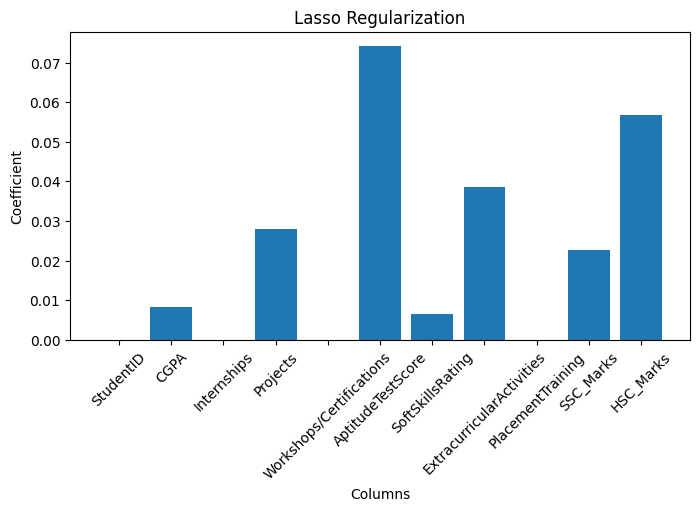

In [19]:
plt.figure(figsize=(8,4))
plt.bar(x.columns, lasso.coef_)
plt.title("Lasso Regularization")
plt.xlabel("Columns")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.show()

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)

Ridge(alpha=10)

In [21]:
ridge.score(x_test, y_test)*100 

40.8844496684848

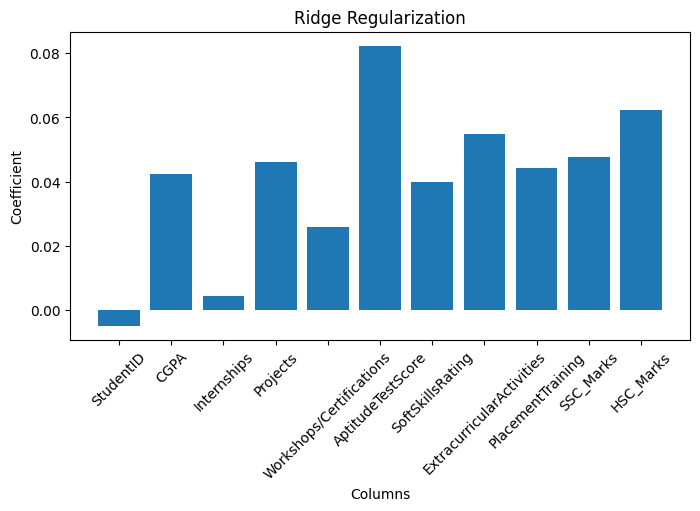

In [22]:
plt.figure(figsize=(8,4))
plt.bar(x.columns, ridge.coef_)
plt.title("Ridge Regularization")
plt.xlabel("Columns")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'StudentID'),
  Text(1, 0, 'CGPA'),
  Text(2, 0, 'Internships'),
  Text(3, 0, 'Projects'),
  Text(4, 0, 'Workshops/Certifications'),
  Text(5, 0, 'AptitudeTestScore'),
  Text(6, 0, 'SoftSkillsRating'),
  Text(7, 0, 'ExtracurricularActivities'),
  Text(8, 0, 'PlacementTraining'),
  Text(9, 0, 'SSC_Marks'),
  Text(10, 0, 'HSC_Marks')])

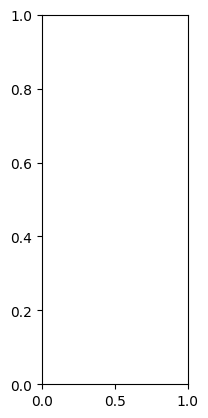

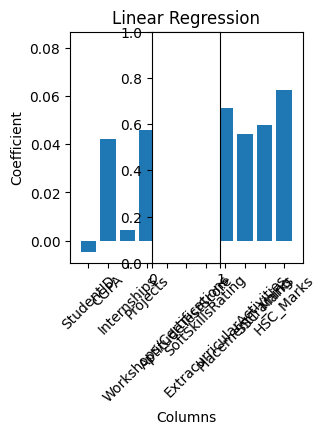

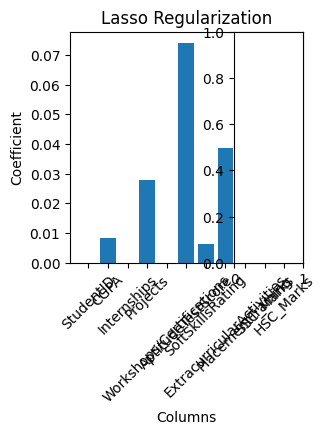

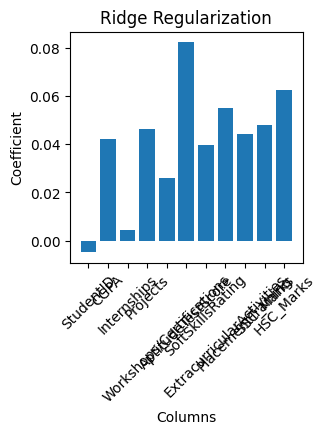

In [24]:
plt.subplot(1,3,1)
plt.figure(figsize=(3,3))
plt.bar(x.columns, lr.coef_,)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.figure(figsize=(3,3))
plt.bar(x.columns, lasso.coef_)
plt.title("Lasso Regularization")
plt.xlabel("Columns")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.figure(figsize=(3,3))
plt.bar(x.columns, ridge.coef_)
plt.title("Ridge Regularization")
plt.xlabel("Columns")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
print(f"Mean Squared Error: {mean_squared_error(y_test, lr.predict(x_test))}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, lr.predict(x_test))}")
print(f'R^2 Score: {r2_score(y_test, lr.predict(x_test))}')

Mean Squared Error: 0.1434176653418724
Mean Absolute Error: 0.3029181793988467
R^2 Score: 0.408840475252377


In [33]:
print(f"Mean Squared Error: {mean_squared_error(y_test, lasso.predict(x_test))}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, lasso.predict(x_test))}")
print(f'R^2 Score: {r2_score(y_test, lasso.predict(x_test))}')

Mean Squared Error: 0.16304262099578506
Mean Absolute Error: 0.3723284806469141
R^2 Score: 0.3279475153097847


In [34]:
print(f"Mean Squared Error: {mean_squared_error(y_test, ridge.predict(x_test))}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, ridge.predict(x_test))}")
print(f'R^2 Score: {r2_score(y_test, ridge.predict(x_test))}')

Mean Squared Error: 0.1434166897262692
Mean Absolute Error: 0.30293934867780337
R^2 Score: 0.408844496684848


In [35]:
# We create a dataframe

error_df = pd.DataFrame({"col name":x.columns, "LinearRegression":lr.coef_, "Lasso":lasso.coef_, "Ridge":ridge.coef_})
error_df.head(10)

,col name,LinearRegression,Lasso,Ridge
0,StudentID,-0.004829,-0.000000,-0.004820
1,CGPA,0.042368,0.008353,0.042367
2,Internships,0.004456,0.000000,0.004491
3,Projects,0.046143,0.027861,0.046150
4,Workshops/Certifications,0.025834,0.000000,0.025848
5,AptitudeTestScore,0.082410,0.074094,0.082317
6,SoftSkillsRating,0.039757,0.006475,0.039768
7,ExtracurricularActivities,0.054893,0.038523,0.054869
8,PlacementTraining,0.044430,0.000000,0.044409
9,SSC_Marks,0.047844,0.022762,0.047844
